In [89]:
%matplotlib inline
import numpy as np  # Для математических операций и работы с массивами
import pandas as pd  # Для работы с табличными данными
import matplotlib.pyplot as plt  # Для построения графиков
import seaborn as sns  # Для визуализации данных (более красивые графики)
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge # Модель линейной регрессии
from sklearn.preprocessing import StandardScaler  # Для стандартизации данных
from sklearn.model_selection import train_test_split  # Для разделения на train/test
from sklearn.linear_model import LogisticRegression  # Модель логистической регрессии
from sklearn.preprocessing import PolynomialFeatures  # Для создания полиномиальных признаков
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error  # Метрики ошибок
from sklearn.metrics import r2_score  # Метрика качества R²
from phik.report import plot_correlation_matrix  # Для визуализации матрицы корреляций
from sklearn.preprocessing import OneHotEncoder  # Для кодирования категориальных переменных
from sklearn.impute import SimpleImputer  # Для заполнения пропущенных значений
from sklearn.pipeline import make_pipeline  # Для создания пайплайнов обработки
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold  # Для кросс-валидации
from sklearn.preprocessing import RobustScaler  # ← теперь RobustScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve


In [90]:
data = pd.read_csv('financials.csv', sep=',')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          505 non-null    object 
 1   Name            505 non-null    object 
 2   Sector          505 non-null    object 
 3   Price           505 non-null    float64
 4   Price/Earnings  505 non-null    float64
 5   Dividend Yield  505 non-null    float64
 6   Earnings/Share  505 non-null    float64
 7   52 Week Low     505 non-null    float64
 8   52 Week High    505 non-null    float64
 9   Market Cap      505 non-null    float64
 10  EBITDA          505 non-null    float64
 11  Price/Sales     505 non-null    float64
 12  Price/Book      505 non-null    float64
 13  SEC Filings     505 non-null    object 
 14  Earnings        505 non-null    float64
 15  Sales           505 non-null    float64
 16  Book            505 non-null    float64
dtypes: float64(13), object(4)
memory us

In [91]:
df = data.drop(['Symbol', 'Name', 'SEC Filings', 'Price', 'Price/Earnings', 'Price/Sales', 'Price/Book'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector          505 non-null    object 
 1   Dividend Yield  505 non-null    float64
 2   Earnings/Share  505 non-null    float64
 3   52 Week Low     505 non-null    float64
 4   52 Week High    505 non-null    float64
 5   Market Cap      505 non-null    float64
 6   EBITDA          505 non-null    float64
 7   Earnings        505 non-null    float64
 8   Sales           505 non-null    float64
 9   Book            505 non-null    float64
dtypes: float64(9), object(1)
memory usage: 39.6+ KB


In [92]:
# Применяем one-hot encoding к очищенным данным
df_encoded = pd.get_dummies(
    df,
    columns=['Sector'],
    prefix='Sector',
    drop_first=True,
    dtype=int  # гарантирует, что столбцы будут int
)

# Целевая переменная
y = df_encoded['Market Cap']

# Признаки (все остальные столбцы, кроме целевой)
X = df_encoded.drop('Market Cap', axis=1)


In [8]:
X

,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,EBITDA,Earnings,Sales,Book,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Real Estate,Sector_Telecommunication Services,Sector_Utilities
0,2.332862,7.92,259.77,175.490,9.048000e+09,9.168655,50.769079,19.655203,0,0,0,0,1,0,0,0,0,0
1,1.147959,1.70,68.39,48.925,6.010000e+08,2.170029,16.848075,9.486614,0,0,0,0,1,0,0,0,0,0
2,1.908982,0.26,64.60,42.280,5.744000e+09,2.499778,15.043522,17.639498,0,0,0,1,0,0,0,0,0,0
3,2.499560,3.29,125.86,60.050,1.031000e+10,5.588872,17.242116,4.149962,0,0,0,1,0,0,0,0,0,0
4,1.714470,5.44,162.60,114.820,5.643228e+09,5.909305,57.796942,14.172316,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,1.170079,1.83,76.81,46.860,7.220000e+08,2.270200,25.764712,13.227872,0,0,0,0,1,0,0,0,0,0
501,1.797080,4.07,86.93,62.850,2.289000e+09,2.800000,12.084953,0.359770,0,0,0,0,0,0,0,0,0,0
502,0.794834,9.01,133.49,108.170,2.007400e+09,8.067737,36.503577,48.338912,0,0,0,1,0,0,0,0,0,0
503,1.480933,2.60,55.61,38.430,1.019784e+09,2.860124,13.363800,35.711268,0,0,1,0,0,0,0,0,0,0


In [9]:
y

0      1.387211e+11
1      1.078342e+10
2      1.021210e+11
3      1.813863e+11
4      9.876586e+10
           ...     
500    1.291502e+10
501    2.700330e+10
502    2.445470e+10
503    1.067068e+10
504    3.599111e+10
Name: Market Cap, Length: 505, dtype: float64

In [93]:
X_train, X_test, y_train, y_test = train_test_split( X, y,  random_state=42, shuffle=True)
print(f"\nРазмеры: Train {len(X_train)}, Test {len(X_test)}")


Размеры: Train 378, Test 127


In [94]:
base_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)

print("Базовое качество модели:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_base)):.4f}")
print(f"R²: {r2_score(y_test, y_pred_base):.4f}\n")

Базовое качество модели:
RMSE: 57529257344.3332
R²: 0.6386



In [95]:
param_dist = {
    'max_depth': range(2, 30),
    'min_samples_split': range(2, 30),
    }

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_dist,
    n_iter=50,
    cv=5,
    random_state=42,
    n_jobs=-1
)
search.fit(X_train, y_train)

print(f'Лучшие параметры: {search.best_params_}')
print(f'Лучшее качество на кросс-валидации: {search.best_score_:.3f}')

Лучшие параметры: {'min_samples_split': 2, 'max_depth': 25}
Лучшее качество на кросс-валидации: 0.456


In [96]:
# Расширенный и более сбалансированный поиск параметров
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [2, 4, 6, 8],
    'max_features': ['sqrt', 'log2', 0.5, 0.7],
    'bootstrap': [True, False]
}

# Увеличим количество итераций 
search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_dist,
    n_iter=100,  
    cv=5,
    random_state=42,
    n_jobs=-1,
    scoring='r2'  
)

search.fit(X_train, y_train)

best_model = search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Качество после подбора параметров:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best)):.4f}")
print(f"R²: {r2_score(y_test, y_pred_best):.4f}")
print(f'Лучшие параметры: {search.best_params_}')
print(f'Лучшее качество на кросс-валидации: {search.best_score_:.3f}')

Качество после подбора параметров:
RMSE: 56873826056.9687
R²: 0.6468
Лучшие параметры: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 15, 'bootstrap': True}
Лучшее качество на кросс-валидации: 0.543


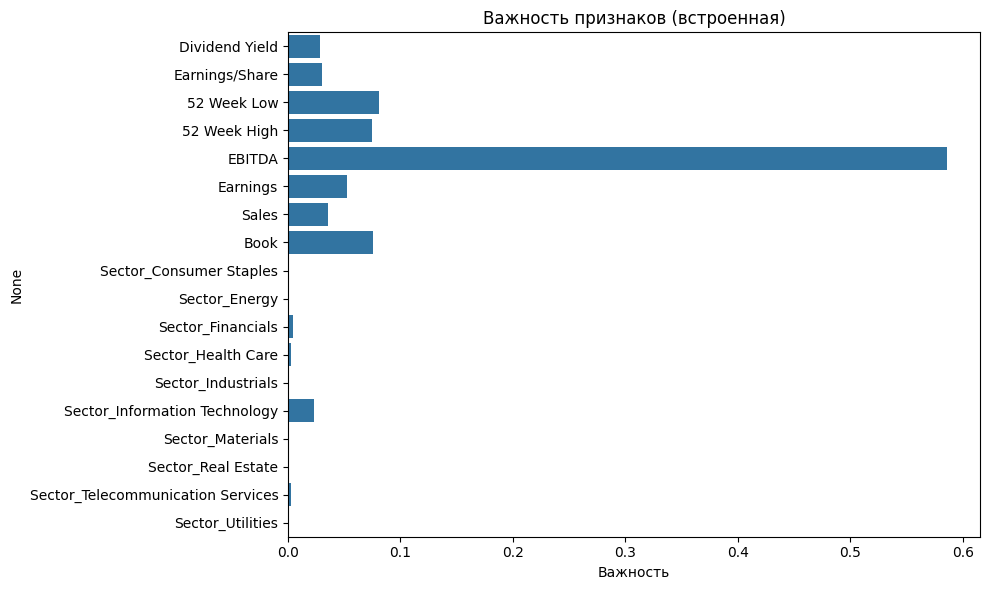

In [97]:
feature_importance = X_train.columns
features = search.best_estimator_.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=feature_importance)
plt.title('Важность признаков (встроенная)')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()

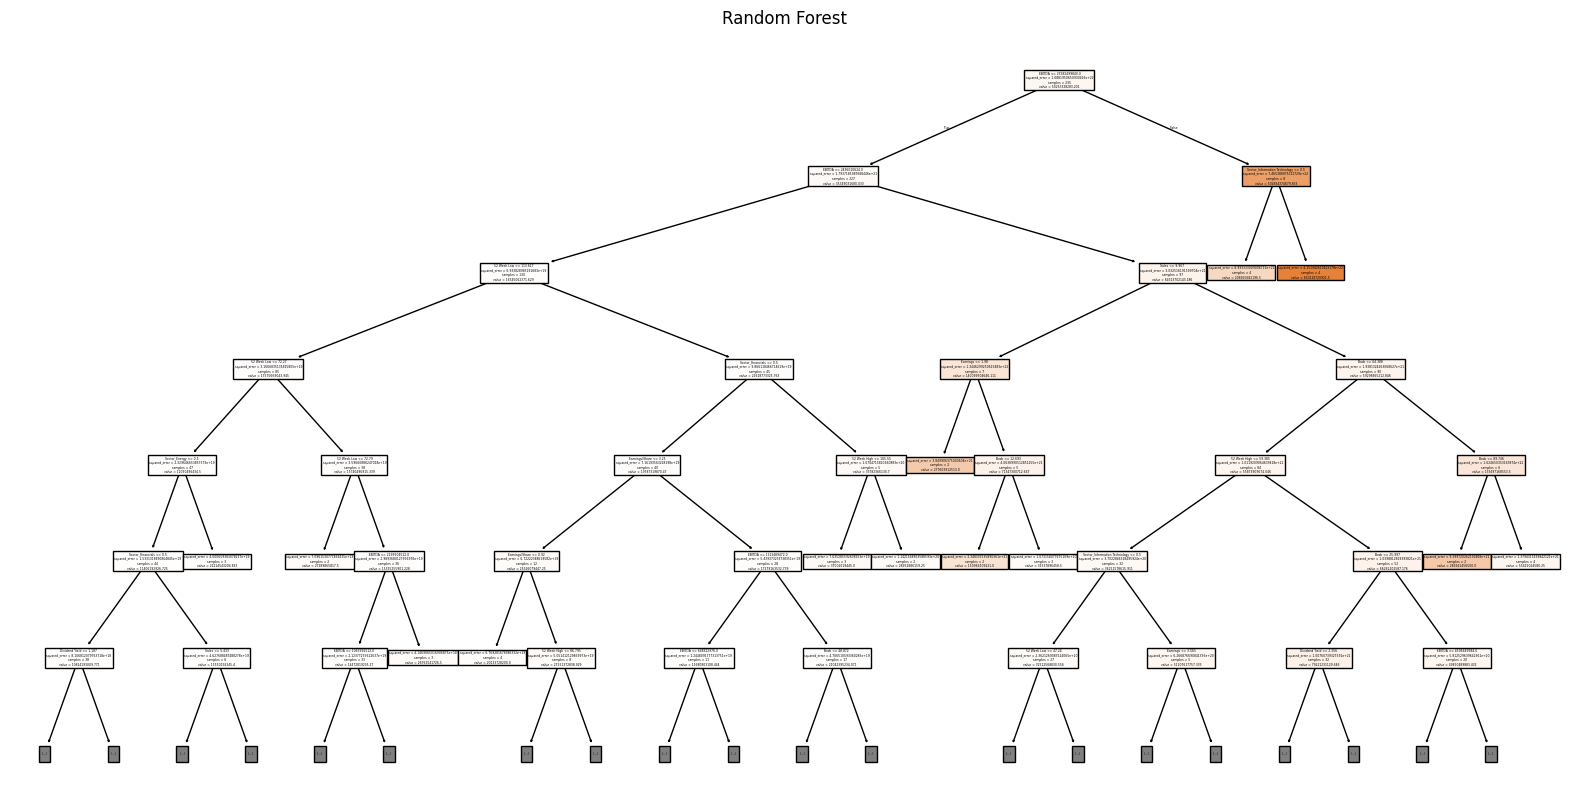

In [98]:
from sklearn.tree import plot_tree


best_model = search.best_estimator_

plt.figure(figsize=(20, 10))
plot_tree(search.best_estimator_.estimators_[0], 
          feature_names=X_train.columns,
          filled=True,
          max_depth=6)
plt.title("Random Forest")
plt.show()

In [99]:
s1 = search.best_estimator_.feature_importances_
# Отбор признаков по важности
selected_features = X_train.columns[s1 > 0]

# Создание новых наборов данных с отобранными признаками
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_train_selected

,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,EBITDA,Earnings,Sales,Book,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Information Technology,Sector_Materials,Sector_Real Estate,Sector_Telecommunication Services,Sector_Utilities
182,1.352004,2.36,67.540,51.960000,7.216430e+08,2.389549,27.557630,10.875676,0,0,0,0,1,0,0,0,0,0
155,1.966102,4.54,126.650,83.230000,1.507000e+09,4.400828,27.741936,11.704705,1,0,0,0,0,0,0,0,0,0
280,0.262683,3.38,72.170,43.647053,1.405319e+09,3.850814,51.542239,33.585227,0,0,0,0,0,0,0,0,0,0
126,2.049254,-0.65,61.315,42.265000,5.328000e+09,0.730015,25.640313,24.648148,0,1,0,0,0,0,0,0,0,0
448,0.609113,3.16,89.920,50.960000,1.097534e+09,3.140039,25.560943,12.354642,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.000000,0.80,499.000,263.000000,4.012930e+08,5.800480,104.220158,43.536825,0,0,0,0,0,0,0,0,0,0
270,2.891845,0.01,22.750,16.560000,5.981000e+09,0.670124,5.949143,15.700935,0,1,0,0,0,0,0,0,0,0
348,5.443620,1.66,61.360,47.140000,1.851783e+09,1.600000,20.795453,13.498759,0,1,0,0,0,0,0,0,0,0
435,0.138145,1.14,62.190,45.000000,1.454000e+09,2.509715,52.171324,21.610895,0,0,0,0,1,0,0,0,0,0


In [100]:
search.fit(X_train_selected, y_train)
print(f'Лучшие параметры: {search.best_params_}')
print(f'Лучшее качество на кросс-валидации: {search.best_score_:.3f}')

Лучшие параметры: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 15, 'bootstrap': True}
Лучшее качество на кросс-валидации: 0.543


In [101]:
# Проверим данный вариант на тестовой выборке
y_test_pred = search.predict(X_test_selected)

# Вычислим MSE, RMSE и MAE на тестовой выборке
mse = mean_squared_error(y_test, y_test_pred)
rmse = root_mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred) 
mape = mean_absolute_percentage_error (y_test, y_test_pred) 
# Рассчитаем Коэффициент детерминации на обучающей и тестовой выборках
r_sq_train = search.score(X_train_selected, y_train)
r_sq_test = search.score(X_test_selected, y_test)

print(f"MSE (Mean Squared Error):  {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}")

print(f"Коэффициент детерминации на train r^2: {r_sq_train}")
print(f"Коэффициент детерминации на test r^2: {r_sq_test}")

MSE (Mean Squared Error):  3234632090358334357504.00
RMSE (Root Mean Squared Error): 56873826056.97
MAE (Mean Absolute Error): 22541231910.45
MAPE (Mean Absolute Percentage Error): 0.84
Коэффициент детерминации на train r^2: 0.8503140399007931
Коэффициент детерминации на test r^2: 0.6468277855736221


In [102]:
search.fit(X_train_selected, y_train)
print(f'Лучшие параметры: {search.best_params_}')
print(f'Лучшее качество на кросс-валидации: {search.best_score_:.3f}')

Лучшие параметры: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 15, 'bootstrap': True}
Лучшее качество на кросс-валидации: 0.543



Подбор параметров дал умеренное улучшение качества:
R² увеличился с 0.6386 до 0.6468 (+1.3%)
RMSE снизился с 57.5 млрд до 56.9 млрд (-1.1%)


Отбор наиболее важных признаков не улучшил качество на кросс-валидации
Качество на кросс-валидации осталось на уровне 0.543
На тестовой выборке R² = 0.662 


Заметный разрыв между R² на train (0.766) и test (0.662)
Модель переобучается, несмотря на регуляризационные параметры


Абсолютные значения ошибок чрезвычайно высоки (RMSE ~55-57 млрд)
Это указывает на необходимость трансформации целевой переменной

In [103]:
# Логарифмирование ВСЕХ финансовых показателей для одинакового масштаба
financial_metrics = ['Market Cap', 'EBITDA', 'Earnings', 'Sales'] 

for metric in financial_metrics:
    if metric in df_encoded.columns:
        
        # Перед логарифмированием посчитаем количество отрицательных, положительных и 0 значчений
        original_values = df_encoded[metric]
        negative_count = (original_values < 0).sum()
        zero_count = (original_values == 0).sum()
        positive_count = (original_values > 0).sum()

        # Для всех финансовых показателей используем signed log transform
        df_encoded[f'Log_{metric}'] = np.log(np.abs(original_values) + 1) * np.sign(original_values)
        
        # Проверяем результат
        log_values = df_encoded[f'Log_{metric}']
        nan_count = log_values.isna().sum()
        inf_count = np.isinf(log_values).sum()
        
        #  примеры для отрицательных значений (если есть)
        if negative_count > 0:
            negative_examples = df_encoded[original_values < 0].head(2)
            print(f"  Примеры отрицательных значений:")
            for idx, row in negative_examples.iterrows():
                company_name = df_encoded.loc[idx, 'Name'] if 'Name' in df_encoded.columns else f"Index {idx}"
                original_val = row[metric]
                log_val = row[f'Log_{metric}']
                print(f"    {company_name}: {metric} = {original_val:,.2f} → Log_{metric} = {log_val:.4f}")

print(f"\n=== ИТОГИ ЛОГАРИФМИРОВАНИЯ ===")
# Проверяем все созданные логарифмированные колонки
log_columns = [f'Log_{metric}' for metric in financial_metrics if f'Log_{metric}' in df_encoded.columns]

for log_col in log_columns:
    values = df_encoded[log_col]
    nan_count = values.isna().sum()
    inf_count = np.isinf(values).sum()
    
    if nan_count == 0 and inf_count == 0:
        print(f" {log_col}: OK (min={values.min():.4f}, max={values.max():.4f})")
    else:
        print(f"{log_col}: {nan_count} NaN, {inf_count} inf")

  Примеры отрицательных значений:
    Index 23: EBITDA = -2,888,100,000.00 → Log_EBITDA = -21.7839
    Index 59: EBITDA = -378,100,000.00 → Log_EBITDA = -19.7507
  Примеры отрицательных значений:
    Index 43: Earnings = -2.64 → Log_Earnings = -1.2919
    Index 49: Earnings = -0.15 → Log_Earnings = -0.1398

=== ИТОГИ ЛОГАРИФМИРОВАНИЯ ===
 Log_Market Cap: OK (min=21.6888, max=27.4197)
 Log_EBITDA: OK (min=-22.3460, max=25.1101)
 Log_Earnings: OK (min=-2.3786, max=4.3234)
 Log_Sales: OK (min=0.8204, max=6.8893)


In [104]:
df_log = df_encoded.drop(['Market Cap', 'EBITDA', 'Earnings', 'Sales'], axis=1)

In [105]:
# Целевая переменная
y_log = df_log['Log_Market Cap']

# Признаки (все остальные столбцы, кроме целевой)
X_log = df_log.drop('Log_Market Cap', axis=1)

# Разделяем на трэйн / тест в дефолтном соотношении 75 / 25
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, random_state=42)

In [106]:
# Расширенный и более сбалансированный поиск параметров
param_dist = {
    'n_estimators': [200, 300, 400],
    'max_depth': [8, 10, 12],
    'min_samples_split': [15, 20, 25],
    'min_samples_leaf': [5, 7, 10],
    'max_features': [0.3, 0.4, 0.5],
    'max_samples': [0.7, 0.8, 0.9],  # новый: subsample для каждого дерева
    'min_impurity_decrease': [0.0, 0.001, 0.005],  # новый: порог для разделения
    'bootstrap': [True]
}

# Увеличим количество итераций 
search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_dist,
    n_iter=100,  
    cv=5,
    random_state=42,
    n_jobs=-1,
    scoring='r2'  
)

search.fit(X_train_log, y_train_log)

best_model = search.best_estimator_
y_pred_best = best_model.predict(X_test_log)

print("Качество после подбора параметров:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_log, y_pred_best)):.4f}")
print(f"R²: {r2_score(y_test_log, y_pred_best):.4f}")
print(f'Лучшие параметры: {search.best_params_}')
print(f'Лучшее качество на кросс-валидации: {search.best_score_:.3f}')

Качество после подбора параметров:
RMSE: 0.6105
R²: 0.6568
Лучшие параметры: {'n_estimators': 400, 'min_samples_split': 15, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.001, 'max_samples': 0.8, 'max_features': 0.5, 'max_depth': 12, 'bootstrap': True}
Лучшее качество на кросс-валидации: 0.665


In [107]:
# Вычислим MSE, RMSE и MAE на тестовой выборке
mse_log = mean_squared_error(y_test_log, y_pred_best)
rmse_log = root_mean_squared_error(y_test_log, y_pred_best)
mae_log = mean_absolute_error(y_test_log, y_pred_best)  
mape_log = mean_absolute_percentage_error(y_test_log, y_pred_best)  

# Рассчитаем Коэффициент детерминации на обучающей и тестовой выборках
r_sq_train_log = search.score(X_train_log, y_train_log)
r_sq_test_log = search.score(X_test_log, y_test_log)

print(f"MSE (Mean Squared Error):  {mse_log:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_log:.2f}")
print(f"MAE (Mean Absolute Error): {mae_log:.2f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape_log:.2f}")

print(f"Коэффициент детерминации на train r^2: {r_sq_train_log}")
print(f"Коэффициент детерминации на test r^2: {r_sq_test_log}")

MSE (Mean Squared Error):  0.37
RMSE (Root Mean Squared Error): 0.61
MAE (Mean Absolute Error): 0.44
MAPE (Mean Absolute Percentage Error): 0.02
Коэффициент детерминации на train r^2: 0.8025567940925921
Коэффициент детерминации на test r^2: 0.656753378948351


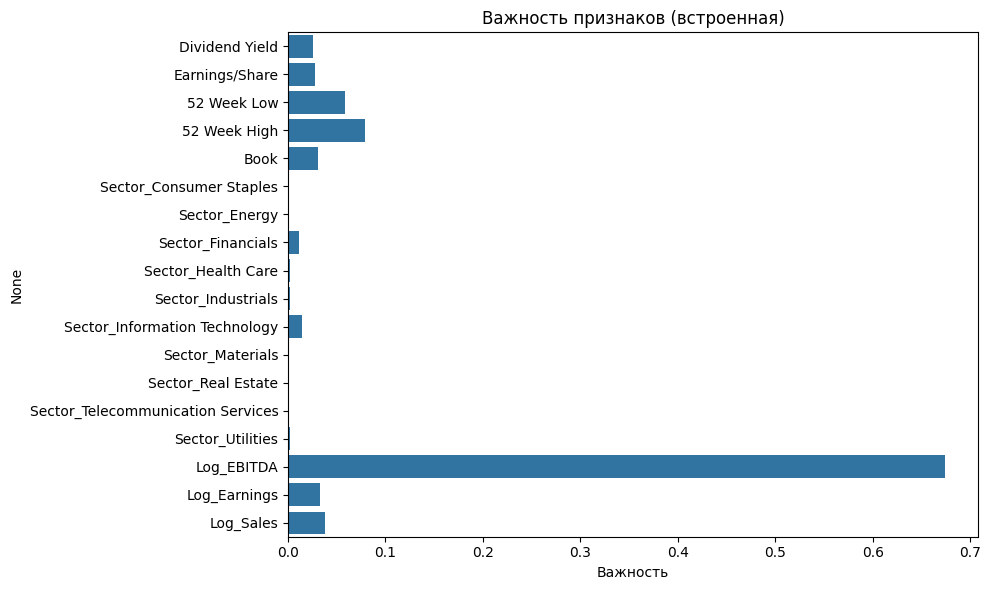

In [108]:
feature_importance_log = X_train_log.columns
features_log = search.best_estimator_.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=features_log, y=feature_importance_log)
plt.title('Важность признаков (встроенная)')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()